## ID: 20127395
## NAME: PHAN MINH XUAN
## CLASS: 20CLC01

In [1]:
import graphviz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Read data

In [2]:
df=pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Check Data

In [4]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Split Feature and Label data

In [6]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [7]:
feature = df.drop(['class'], axis=1)
label = df['class']

In [8]:
list_ = list(df.columns[1:])
list_

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

## Train 40 / Test 60

Decision Tree Classification
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2496
           1       1.00      1.00      1.00      2379

    accuracy                           1.00      4875
   macro avg       1.00      1.00      1.00      4875
weighted avg       1.00      1.00      1.00      4875

Confusion Matrix


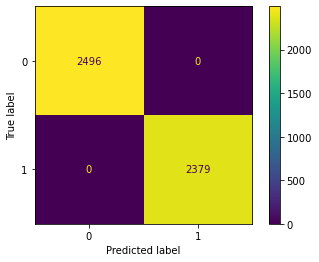

Decision Tree


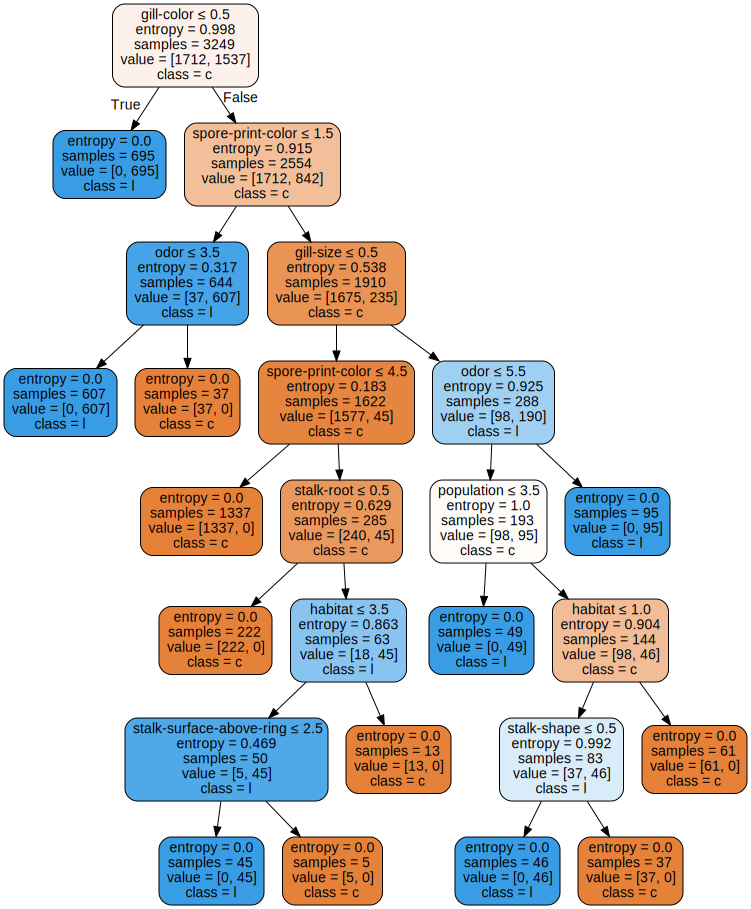

In [10]:
classifer = DecisionTreeClassifier(criterion='entropy')
feature_train, feature_test, label_train, label_test = train_test_split(feature, label,train_size=0.4, test_size = 0.6, random_state=42)
classifer = classifer.fit(feature_train, label_train)
y_pred = classifer.predict(feature_test)

print('Decision Tree Classification\n', classification_report(label_test, y_pred))

print ("Confusion Matrix")
cm = confusion_matrix(label_test,y_pred, labels=classifer.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()
plt.show()

print('Decision Tree')
data_decision = export_graphviz(classifer, out_file=None, feature_names=list(list_),class_names='class',filled=True, rounded=True,special_characters=True) 
graphviz.Source(data_decision)

## Train 60 / Test 40

Decision Tree Classification
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1678
           1       1.00      1.00      1.00      1572

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250

Confusion Matrix


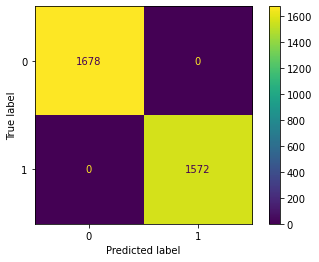

Decision Tree


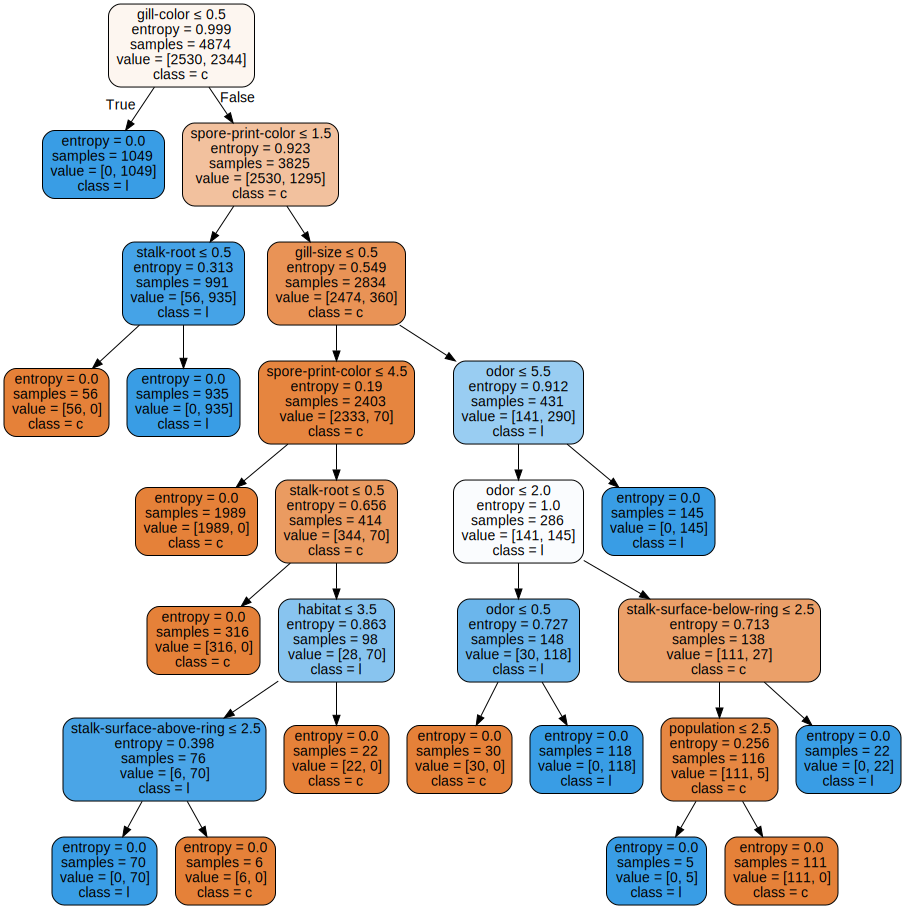

In [12]:
classifer = DecisionTreeClassifier(criterion='entropy')
feature_train, feature_test, label_train, label_test = train_test_split(feature, label,train_size=0.6, test_size = 0.4, random_state=42)
classifer = classifer.fit(feature_train, label_train)
y_pred = classifer.predict(feature_test)

print('Decision Tree Classification\n', classification_report(label_test, y_pred))

print ("Confusion Matrix")
cm = confusion_matrix(label_test,y_pred, labels=classifer.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()
plt.show()

print('Decision Tree')
data_decision = export_graphviz(classifer, out_file=None, feature_names=list(list_),class_names='class',filled=True, rounded=True,special_characters=True) 
graphviz.Source(data_decision)

## Train 80 / Test 20

Decision Tree Classification
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix


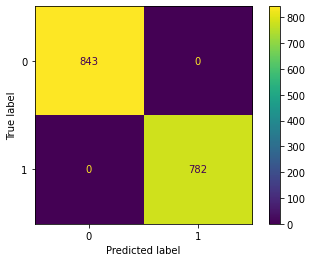

Decision Tree


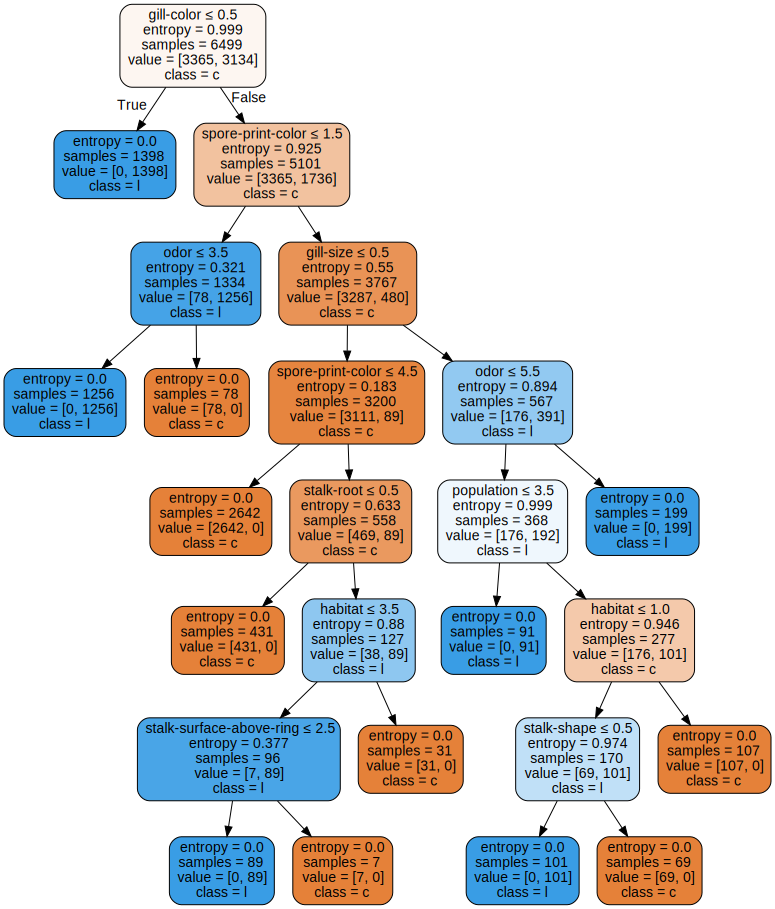

In [13]:
classifer = DecisionTreeClassifier(criterion='entropy')
feature_train, feature_test, label_train, label_test = train_test_split(feature, label,train_size=0.8, test_size = 0.2, random_state=42)
classifer = classifer.fit(feature_train, label_train)
y_pred = classifer.predict(feature_test)

print('Decision Tree Classification\n', classification_report(label_test, y_pred))

print ("Confusion Matrix")
cm = confusion_matrix(label_test,y_pred, labels=classifer.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()
plt.show()

print('Decision Tree')
data_decision = export_graphviz(classifer, out_file=None, feature_names=list(list_),class_names='class',filled=True, rounded=True,special_characters=True) 
graphviz.Source(data_decision)

## Train 90 / Test 10

Decision Tree Classification
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Confusion Matrix


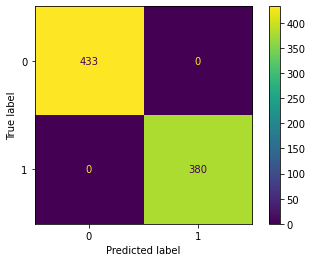

Decision Tree


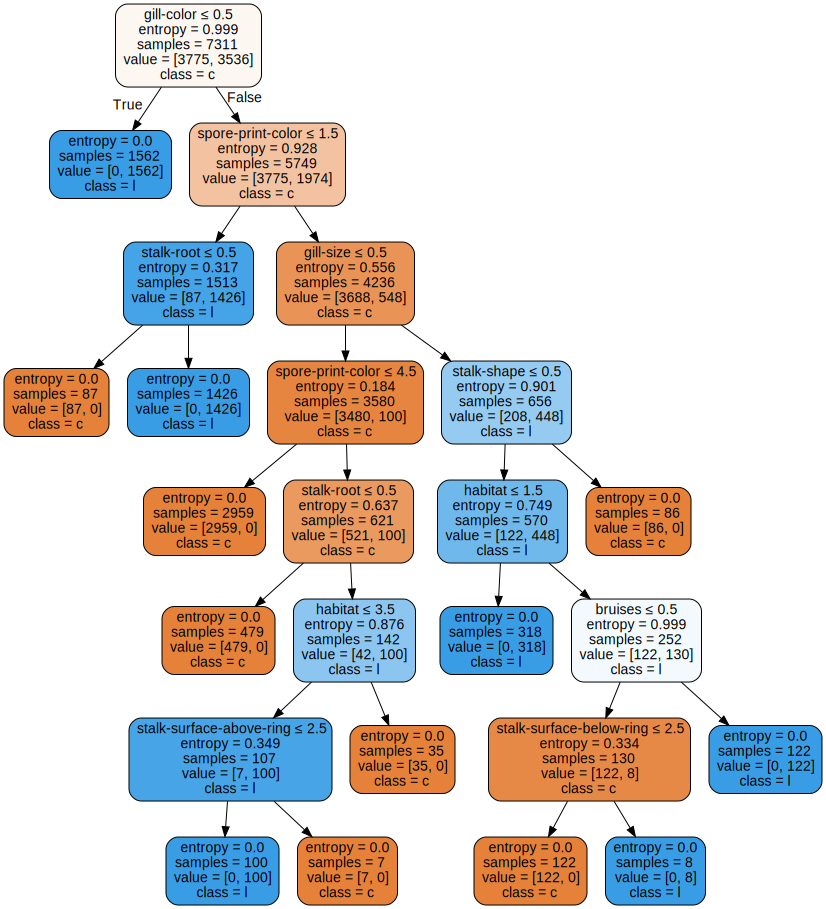

In [14]:
classifer = DecisionTreeClassifier(criterion='entropy')
feature_train, feature_test, label_train, label_test = train_test_split(feature, label,train_size=0.9, test_size = 0.1, random_state=42)
classifer = classifer.fit(feature_train, label_train)
y_pred = classifer.predict(feature_test)

print('Decision Tree Classification\n', classification_report(label_test, y_pred))

print ("Confusion Matrix")
cm = confusion_matrix(label_test,y_pred, labels=classifer.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()
plt.show()

print('Decision Tree')
data_decision = export_graphviz(classifer, out_file=None, feature_names=list(list_),class_names='class',filled=True, rounded=True,special_characters=True) 
graphviz.Source(data_decision)

## Task 2 : The depth and accuracy of a decision tree
## MAXDEPTH = None

In [25]:
array_train= []
array_test = []

Accuracy Score: 1.0
Decision Tree Classification
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       831
           1       1.00      1.00      1.00       794

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix


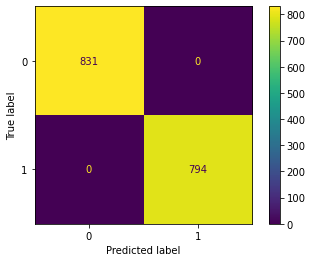

Decision Tree


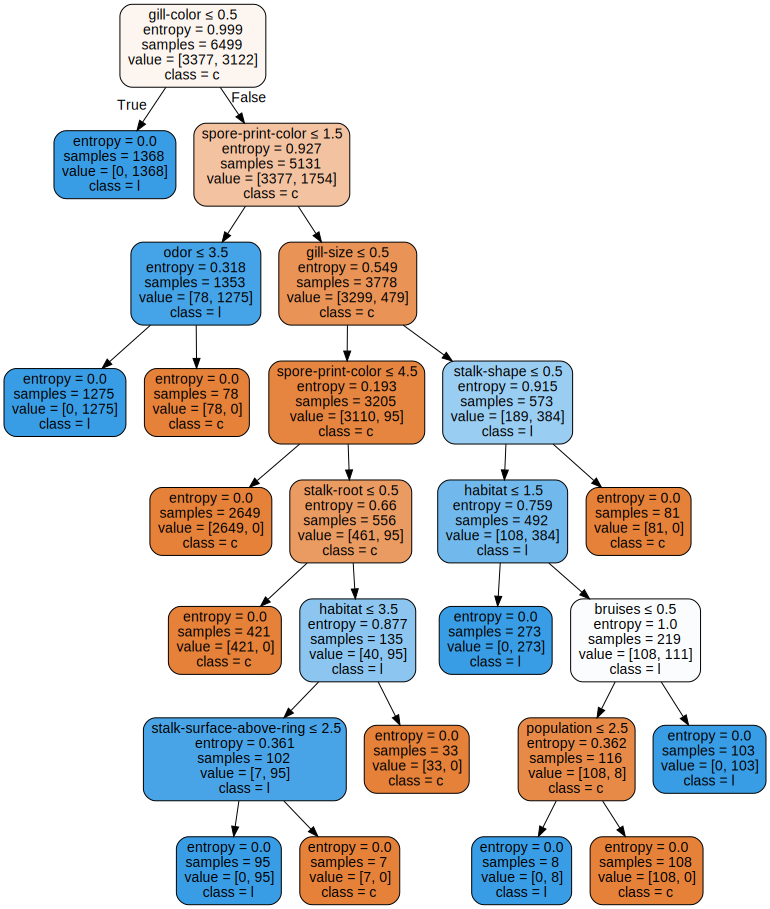

In [26]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth= None)
feature_train, feature_test, label_train, label_test = train_test_split(feature, label,train_size=0.8, test_size = 0.2)
classifier = classifier.fit(feature_train, label_train)
y_pred = classifier.predict(feature_train)
array_train.append(accuracy_score(label_train, y_pred))
y_pred = classifier.predict(feature_test)
array_test.append(accuracy_score(label_test, y_pred))

print('Accuracy Score:', accuracy_score(label_test, y_pred))

print('Decision Tree Classification\n', classification_report(label_test, y_pred))

print ("Confusion Matrix")
cm = confusion_matrix(label_test,y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

print('Decision Tree')
data_decision = export_graphviz(classifier, out_file=None, feature_names=list(list_),class_names='class',filled=True, rounded=True,special_characters=True) 
graphviz.Source(data_decision)

## MAXDEPTH = 2

Accuracy Score: 0.9175384615384615
Decision Tree Classification
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       838
           1       0.97      0.86      0.91       787

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625

Confusion Matrix


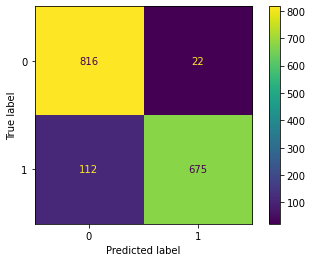

Decision Tree


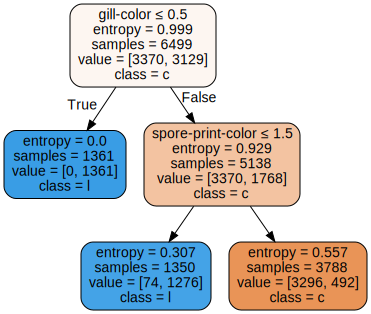

In [27]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth= 2)
feature_train, feature_test, label_train, label_test = train_test_split(feature, label,train_size=0.8, test_size = 0.2)
classifier = classifier.fit(feature_train, label_train)
y_pred = classifier.predict(feature_train)
array_train.append(accuracy_score(label_train, y_pred))
y_pred = classifier.predict(feature_test)
array_test.append(accuracy_score(label_test, y_pred))

print('Accuracy Score:', accuracy_score(label_test, y_pred))

print('Decision Tree Classification\n', classification_report(label_test, y_pred))

print ("Confusion Matrix")
cm = confusion_matrix(label_test,y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

print('Decision Tree')
data_decision = export_graphviz(classifier, out_file=None, feature_names=list(list_),class_names='class',filled=True, rounded=True,special_characters=True) 
graphviz.Source(data_decision)

## MAXDEPTH = 3

Accuracy Score: 0.9507692307692308
Decision Tree Classification
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       810
           1       0.93      0.97      0.95       815

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Confusion Matrix


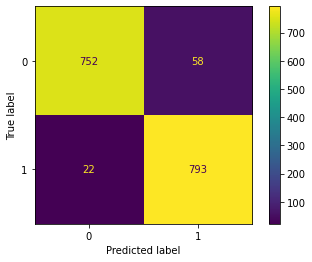

Decision Tree


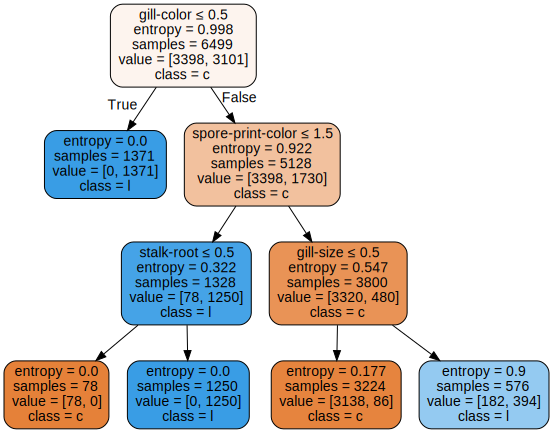

In [28]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth= 3)
feature_train, feature_test, label_train, label_test = train_test_split(feature, label,train_size=0.8, test_size = 0.2)
classifier = classifier.fit(feature_train, label_train)
y_pred = classifier.predict(feature_train)
array_train.append(accuracy_score(label_train, y_pred))
y_pred = classifier.predict(feature_test)
array_test.append(accuracy_score(label_test, y_pred))

print('Accuracy Score:', accuracy_score(label_test, y_pred))

print('Decision Tree Classification\n', classification_report(label_test, y_pred))

print ("Confusion Matrix")
cm = confusion_matrix(label_test,y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

print('Decision Tree')
data_decision = export_graphviz(classifier, out_file=None, feature_names=list(list_),class_names='class',filled=True, rounded=True,special_characters=True) 
graphviz.Source(data_decision)

## MAXDEPTH = 4

Accuracy Score: 0.9667692307692307
Decision Tree Classification
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       848
           1       0.99      0.94      0.96       777

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625

Confusion Matrix


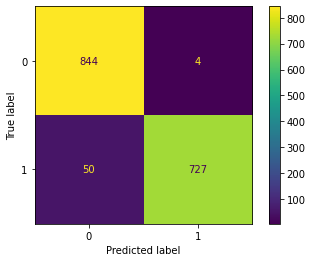

Decision Tree


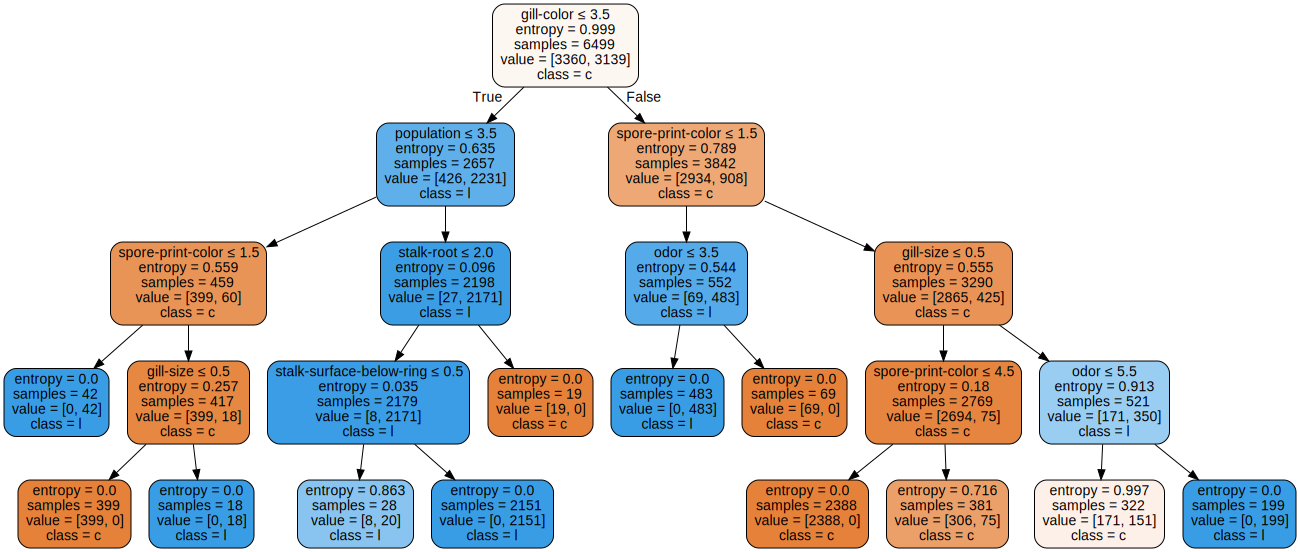

In [29]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth= 4)
feature_train, feature_test, label_train, label_test = train_test_split(feature, label,train_size=0.8, test_size = 0.2)
classifier = classifier.fit(feature_train, label_train)
y_pred = classifier.predict(feature_train)
array_train.append(accuracy_score(label_train, y_pred))
y_pred = classifier.predict(feature_test)
array_test.append(accuracy_score(label_test, y_pred))

print('Accuracy Score:', accuracy_score(label_test, y_pred))

print('Decision Tree Classification\n', classification_report(label_test, y_pred))

print ("Confusion Matrix")
cm = confusion_matrix(label_test,y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

print('Decision Tree')
data_decision = export_graphviz(classifier, out_file=None, feature_names=list(list_),class_names='class',filled=True, rounded=True,special_characters=True) 
graphviz.Source(data_decision)

## MAXDEPTH = 5

Accuracy Score: 0.9827692307692307
Decision Tree Classification
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       853
           1       0.98      0.99      0.98       772

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625

Confusion Matrix


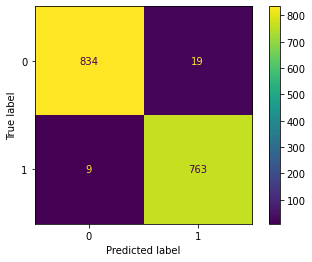

Decision Tree


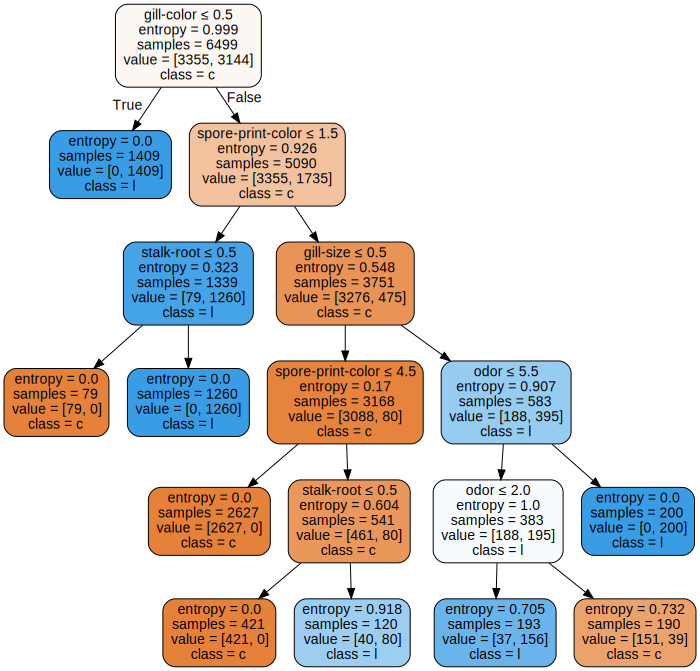

In [30]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth= 5)
feature_train, feature_test, label_train, label_test = train_test_split(feature, label,train_size=0.8, test_size = 0.2)
classifier = classifier.fit(feature_train, label_train)
y_pred = classifier.predict(feature_train)
array_train.append(accuracy_score(label_train, y_pred))
y_pred = classifier.predict(feature_test)
array_test.append(accuracy_score(label_test, y_pred))

print('Accuracy Score:', accuracy_score(label_test, y_pred))

print('Decision Tree Classification\n', classification_report(label_test, y_pred))

print ("Confusion Matrix")
cm = confusion_matrix(label_test,y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

print('Decision Tree')
data_decision = export_graphviz(classifier, out_file=None, feature_names=list(list_),class_names='class',filled=True, rounded=True,special_characters=True) 
graphviz.Source(data_decision)

## MAXDEPTH = 6 

Accuracy Score: 0.992
Decision Tree Classification
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       848
           1       0.98      1.00      0.99       777

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Confusion Matrix


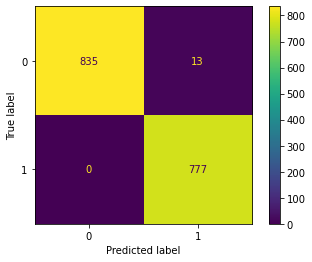

Decision Tree


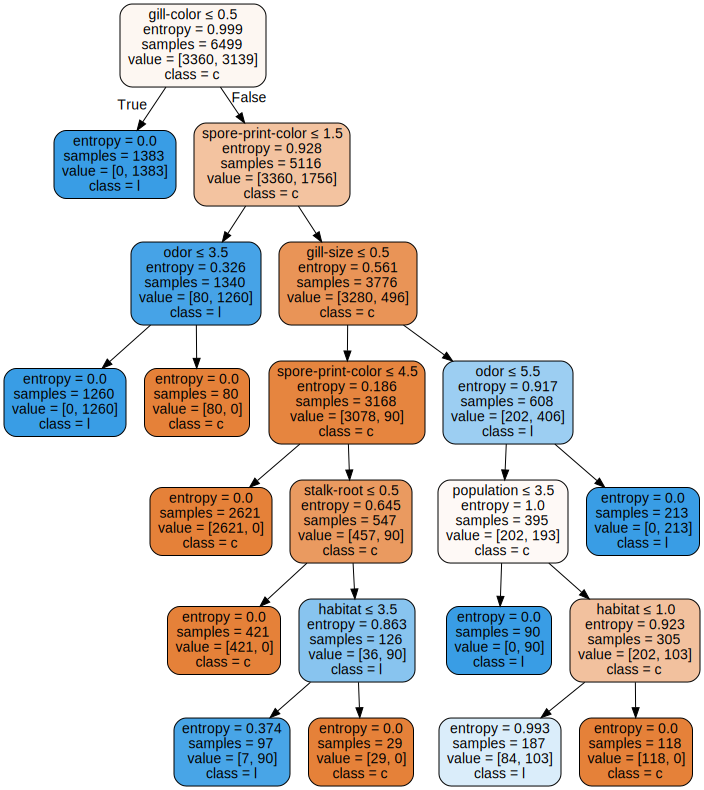

In [31]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth= 6)
feature_train, feature_test, label_train, label_test = train_test_split(feature, label,train_size=0.8, test_size = 0.2)
classifier = classifier.fit(feature_train, label_train)
y_pred = classifier.predict(feature_train)
array_train.append(accuracy_score(label_train, y_pred))
y_pred = classifier.predict(feature_test)
array_test.append(accuracy_score(label_test, y_pred))

print('Accuracy Score:', accuracy_score(label_test, y_pred))

print('Decision Tree Classification\n', classification_report(label_test, y_pred))

print ("Confusion Matrix")
cm = confusion_matrix(label_test,y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

print('Decision Tree')
data_decision = export_graphviz(classifier, out_file=None, feature_names=list(list_),class_names='class',filled=True, rounded=True,special_characters=True) 
graphviz.Source(data_decision)

## MAXDEPTH = 7

Accuracy Score: 1.0
Decision Tree Classification
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       867
           1       1.00      1.00      1.00       758

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix


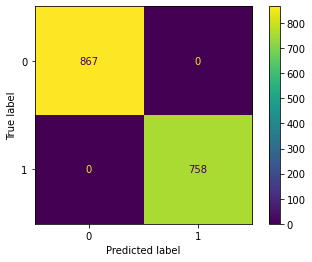

Decision Tree


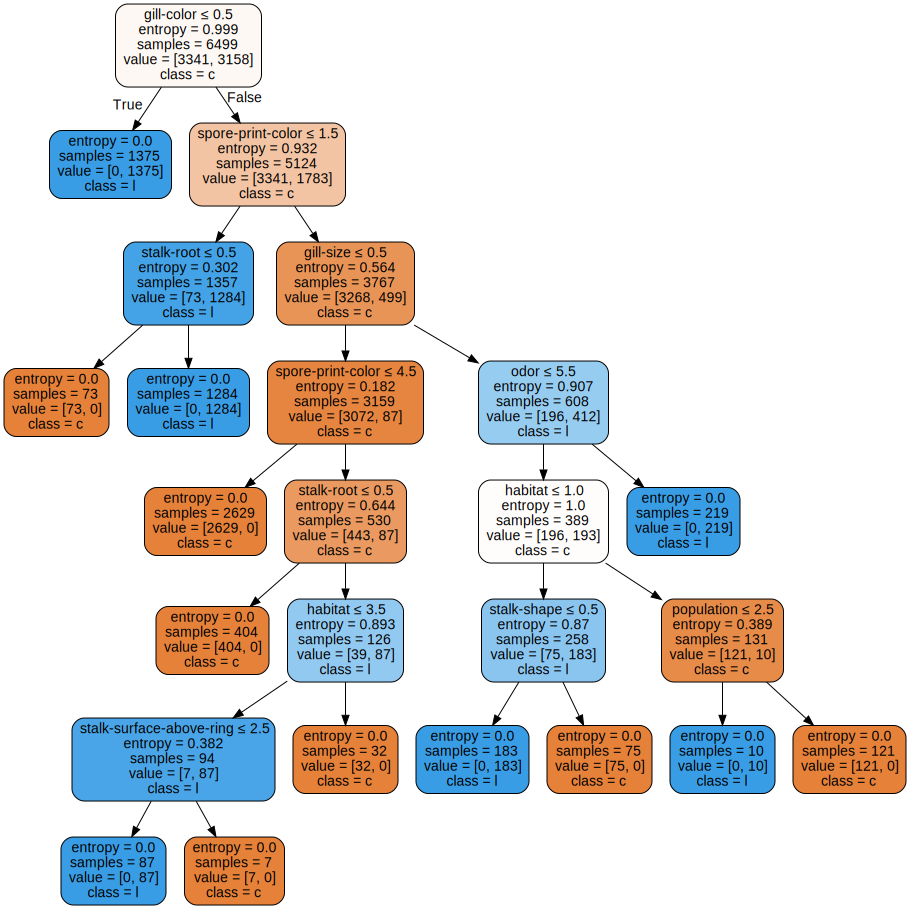

In [32]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth= 7)
feature_train, feature_test, label_train, label_test = train_test_split(feature, label,train_size=0.8, test_size = 0.2)
classifier = classifier.fit(feature_train, label_train)
y_pred = classifier.predict(feature_train)
array_train.append(accuracy_score(label_train, y_pred))
y_pred = classifier.predict(feature_test)
array_test.append(accuracy_score(label_test, y_pred))

print('Accuracy Score:', accuracy_score(label_test, y_pred))

print('Decision Tree Classification\n', classification_report(label_test, y_pred))

print ("Confusion Matrix")
cm = confusion_matrix(label_test,y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

print('Decision Tree')
data_decision = export_graphviz(classifier, out_file=None, feature_names=list(list_),class_names='class',filled=True, rounded=True,special_characters=True) 
graphviz.Source(data_decision)

## TABLE

<table>
<tr>
<td>max_depth </td>
<td>None</td>
<td> 2 </td>
<td> 3 </td>
<td> 4 </td>
<td> 5 </td>
<td> 6 </td>
<td> 7 </td>
</tr>
<tr>
<td>Accuracy</td>
<td>1.0</td>
<td>0.9175384615384615</td>
<td>0.9507692307692308 </td>
<td>0.9667692307692307</td>
<td>0.9827692307692307</td>
<td>0.992</td>
<td>1.0</td>
</tr>
</table>

In [33]:
print (array_train)
print (array_test)

[1.0, 0.9129096784120634, 0.9587628865979382, 0.9639944606862594, 0.9821511001692568, 0.9859978458224342, 1.0]
[1.0, 0.9175384615384615, 0.9507692307692308, 0.9667692307692307, 0.9827692307692307, 0.992, 1.0]


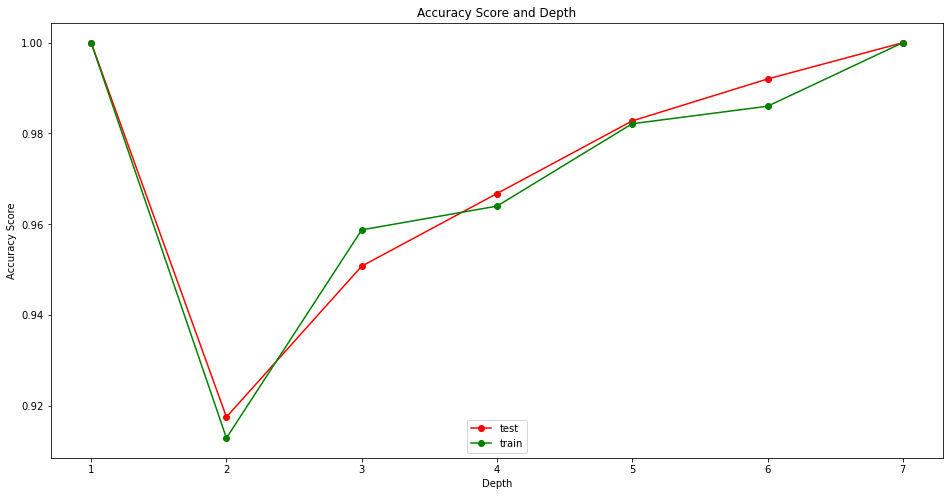

In [35]:
#plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(16,8))
ax.set_title("Accuracy Score and Depth")
ax.set_xlabel('Depth')
ax.set_ylabel('Accuracy Score')
ax.plot(range(1, 8), array_test,color="red",marker="o")
ax.plot(range(1, 8), array_train,color="green",marker="o")
plt.legend(["test", "train"], loc ="lower center")
plt.show()